## PA01- Chandan Patel 



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import nltk
from nltk.stem import WordNetLemmatizer #helps in reducing words to their base or dictionary form.
from nltk.corpus import stopwords # provides a list of commonly used words that can be filtered out (like "and", "the").
from nltk.util import ngrams #helps in creating combinations of adjacent words (like "hello world" to ["hello", "world", "hello world"] for bigrams

from wordcloud import WordCloud #lets you visualize the most frequent words in a dataset.
from PIL import Image # used for opening image for masking wordcloud # you need to install Pillow package

#Downloading Resources and Preparing for Sentiment Analysis:This segment downloads necessary linguistic resources:
import nltk
nltk.download('punkt') #for tokenizing sentences.
nltk.download('stopwords') #for the list of stopwords.
nltk.download('wordnet') #for lemmatization.

nltk.download('vader_lexicon') # just need to do this once on your machine, you can comment out after,contains the data for VADER sentiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#VADER is useful for sentiment analysis, especially for texts that contain slang and emojis.


[nltk_data] Downloading package punkt to C:\Users\CHANDAN
[nltk_data]     PATEL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\CHANDAN
[nltk_data]     PATEL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\CHANDAN
[nltk_data]     PATEL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\CHANDAN
[nltk_data]     PATEL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Clean/preprocess text

### Detectin the text file charater encoding first

In [2]:
import chardet  # character detection

# Open the file
with open("MLK_speech_PA1.txt", "rb") as f:  ## binary read mode 'rb' Binary mode ('b') is used here because chardet works on bytes rather than strings
    # Read the first 100 bytes
    rawdata = f.read(100)
    
# Detect the encoding
result = chardet.detect(rawdata)

# Print the result
print(result)

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


In [3]:
# read in the data using iso-8859-1 encoding
with open('MLK_speech_PA1.txt', 'r', encoding='UTF-16') as file:
    text = file.read()

# tokenize the text
 
tokens = nltk.word_tokenize(text) #The text is split into individual words (tokens)

# remove all tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]

# make lowercase
tokens = [word.lower() for word in tokens]

# remove all tokens that are only one character
tokens = [word for word in tokens if len(word) > 1]

# remove stopwords
stop_words = stopwords.words('english')
tokens = [word for word in tokens if word not in stop_words]

# lemmatize words
nltk.download('wordnet') # uncomment if you need to download the wordnet package
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

# print the first 10 words
print(tokens[:10])

[nltk_data] Downloading package wordnet to C:\Users\CHANDAN
[nltk_data]     PATEL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['happy', 'join', 'today', 'go', 'history', 'greatest', 'demonstration', 'freedom', 'history', 'nation']


### Data Visualizations

(20, 15, 13, 13, 12, 11, 11, 11, 10, 10, 9, 9, 9, 8, 8, 8, 8, 7, 7, 6)
('freedom', 'negro', 'one', 'let', 'ring', 'nation', 'dream', 'day', 'every', 'come', 'today', 'go', 'back', 'satisfied', 'must', 'justice', 'able', 'white', 'together', 'men')


Text(0.5, 1.0, 'Barplot of Top 20 Most Frequent Words')

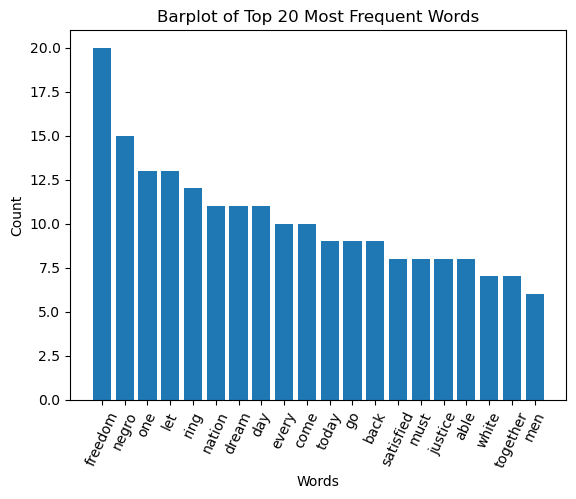

In [4]:
# We want to draw a barplot of the most frequent words in this speech
# to do this, we must create a dictionary with word counts for each word, and sort the dictionary by word counts
token_freq = {}                              # creat an empty dictionary
for token in tokens:                         # for each word in the list of words
    token_freq[token] = token_freq.get(token, 0) + 1  # add 1 to the count value for the key word in the dictionary (rememeber, a dictionary is a key-value pair)

# in the above code, we use get(). It returns the value of a key (word) in a dictionary if it exists. If it doesn't exist
# it returns the value of the second arguement (0 in this case). This is a compact way of counting the frequency of words.

# Since dictionaries are unordered, to sort the word counts from high 
# to low, we must convert the dictionary into a list (of tuples)
word_freq = []                      # create an empty list
for key, value in token_freq.items():     # iterate through the key value pairs in the dictionary
    word_freq.append((value, key))  # append a tuple of (value, key) to word_freq list.
# items() returns a list of tuples with key-value pairs in a dictionary
# Keys and values are reversed in list word_freq for ease of sorting 

# Sort word_freq list from high to low
word_freq.sort(reverse=True)

top20_words = word_freq[0:20]   # slice the first 20 words

# Convert the list of tuples to two tuples for plotting using zip()
values, labels = zip(*top20_words) # unzip the list of tuples into two tuples
print(values)
print(labels)

# Barplot of most frequent words
import matplotlib.pyplot as plt
plt.bar(labels, values)
plt.xlabel('Words')
plt.xticks(rotation=65)
plt.ylabel('Count')
plt.title('Barplot of Top 20 Most Frequent Words')

### Wordcloud


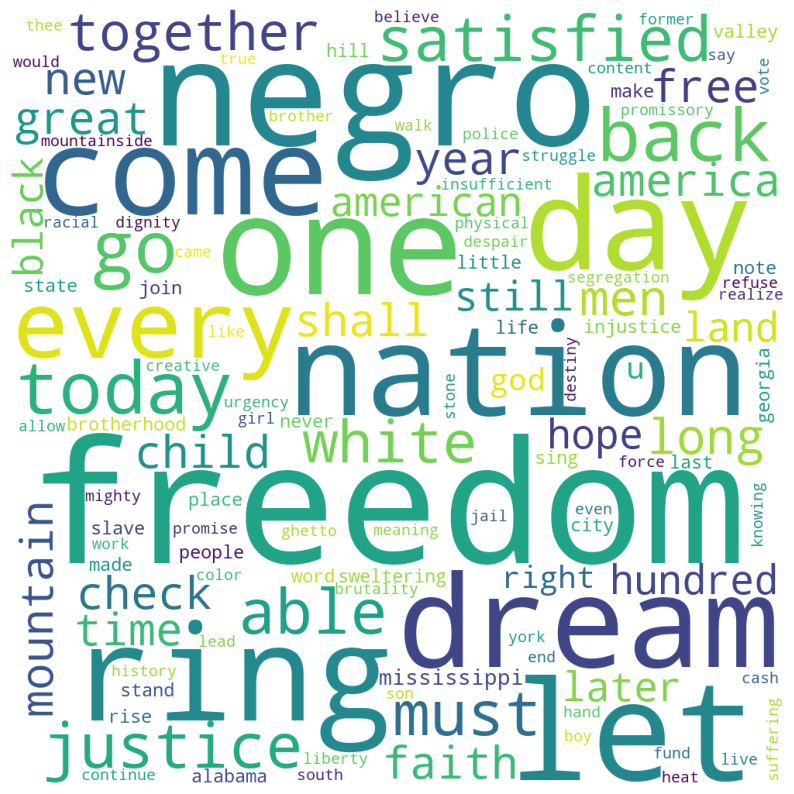

In [5]:
# Create a wordcloud from the token_freq dictionary
wordcloud = WordCloud(
    width=1000,  #Size of the generated image in pixels
    height=1000,  
    background_color='white',  #The background color of the image. It's set to white.
    collocations='FALSE',  #If set to True, it would display frequent bigrams (two adjacent words) like "ice cream" together. 
                            # Setting this to 'FALSE' ensures only individual words are displayed.
    min_font_size=16 # Smallest font size a word can be displayed in
)
# note: if you get an error stating "ValueError: Only supported for TrueType fonts", then 
# run the following two commands at your shell prompt:
# pip install --upgrade pip
# pip install --upgrade Pillow

wordcloud.generate_from_frequencies(token_freq)
plt.figure(figsize = (10,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

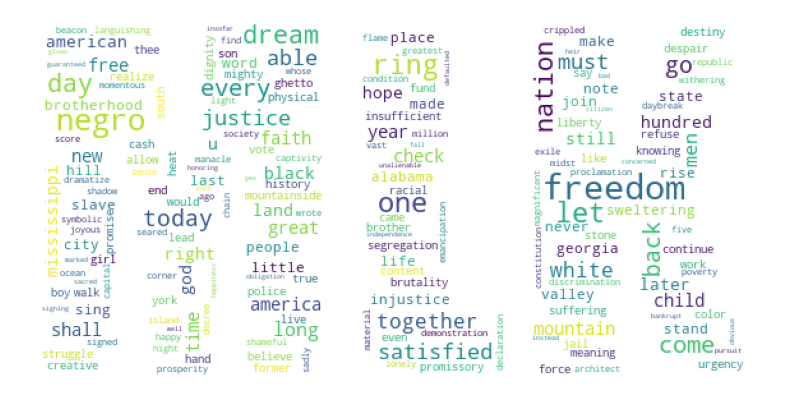

In [6]:
# create a wordcloud, but in the shape of MLK

mask=np.array(Image.open('mlk-text.png'))
# It's then converted to a NumPy array, which results in a matrix representation of the image where each cell 
# value represents the intensity of a pixel.
mask=np.where(mask > 3, 255, mask) 
# This line processes the mask to ensure proper contrast. Any pixel value greater than 3 
# (which is almost all non-black pixels) is set to 255 (white), ensuring the mask has a clear binary distinction.
wordcloud = WordCloud(
    width = mask.shape[0],
    height = mask.shape[1], 
    background_color='white', 
    collocations='FALSE', 
    mask = mask
    )
wordcloud.generate_from_frequencies(token_freq)
plt.figure(figsize = (10,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

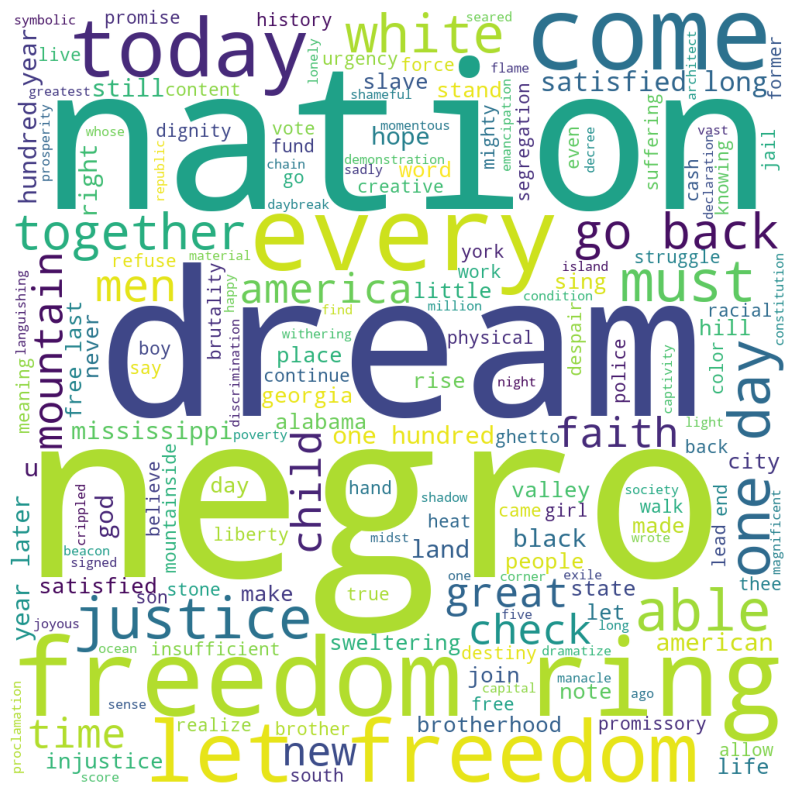

In [7]:
from wordcloud import WordCloud

text_corpus = ' '.join(tokens) #  the list tokens (which presumably contains individual words) is joined into a single 
                               #  string called text_corpus, using a space as a separator.
wordcloud = WordCloud(
    width=1000, 
    height=1000, 
    background_color='white', 
    collocations='FALSE', 
    min_font_size=16
)

wordcloud.generate_from_text(text_corpus)
plt.figure(figsize = (10,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Side trek on n-grams

n-grams are a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles. An n-gram of size 1 is referred to as a "unigram"; size 2 is a "bigram" (or, less commonly, a "digram"); size 3 is a "trigram". Larger sizes are sometimes referred to by the value of n, e.g., "four-gram", "five-gram", and so on.

[('happy', 'join'), ('join', 'today'), ('today', 'go'), ('go', 'history'), ('history', 'greatest'), ('greatest', 'demonstration'), ('demonstration', 'freedom'), ('freedom', 'history'), ('history', 'nation'), ('nation', 'five')]


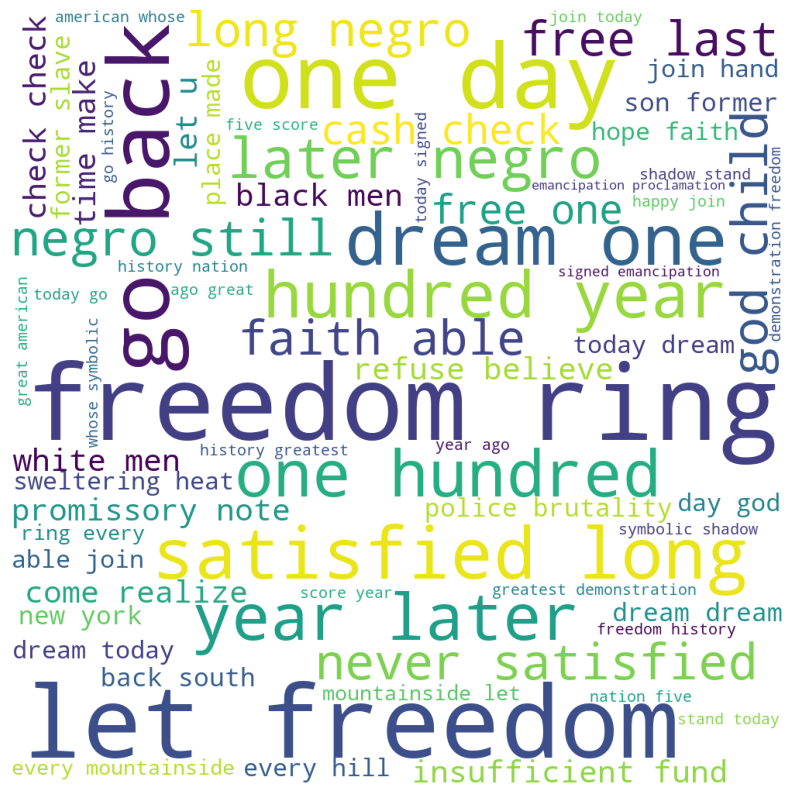

In [8]:
# Create n-grams using NLTK
# n-grams is a way of preserving sequence (and help with meaning) of words

bigrams = list(ngrams(tokens, 2))    # create a list of bigrams (note that the output is a list of tuples)

print(bigrams[:10]) # print the first 10 bigrams
# create a dictionary of bigrams and their counts
bigram_dict = {}
for bigram in bigrams:              # iterate through the list of bigrams
    bigram_str = ' '.join(bigram)   # convert the bigram tuple to string
    bigram_dict[bigram_str] = bigram_dict.get(bigram_str, 0) + 1 # add bigram to dictionary if not exist and set value to 1, otherwise increment existing bigram count by 1
    
# create a word cloud of bigrams
from wordcloud import WordCloud
wordcloud = WordCloud(
    width=1000, 
    height=1000, 
    background_color='white', 
    collocations='FALSE', 
    min_font_size=16)

wordcloud.generate_from_frequencies(bigram_dict)
plt.figure(figsize = (10,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

[('happy', 'join', 'today'), ('join', 'today', 'go'), ('today', 'go', 'history'), ('go', 'history', 'greatest'), ('history', 'greatest', 'demonstration'), ('greatest', 'demonstration', 'freedom'), ('demonstration', 'freedom', 'history'), ('freedom', 'history', 'nation'), ('history', 'nation', 'five'), ('nation', 'five', 'score')]


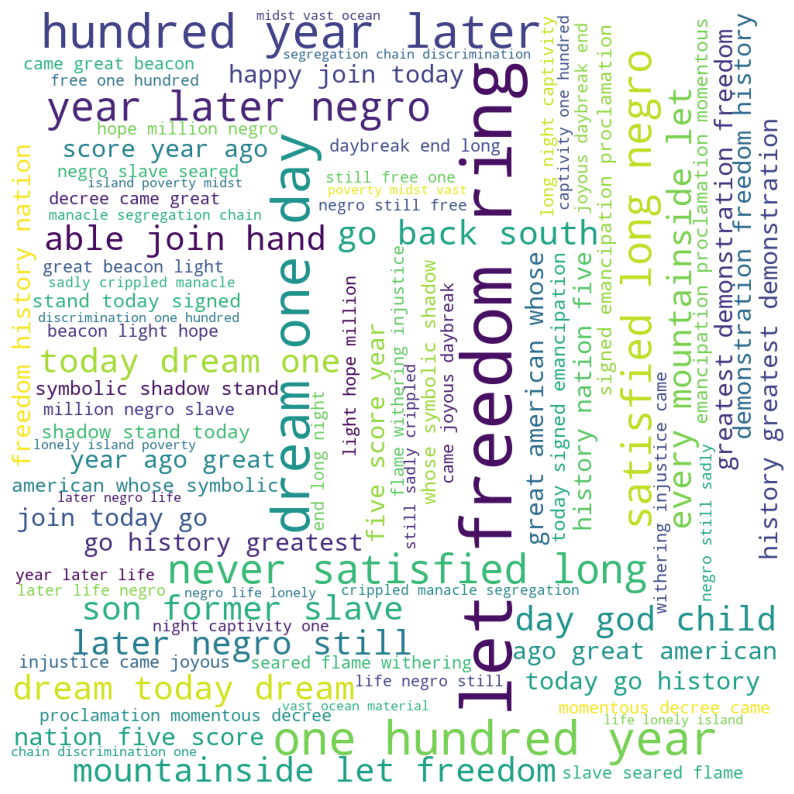

In [9]:
trigrams = list(ngrams(tokens, 3))    # create a list of bigrams (note that the output is a list of tuples)

print(trigrams[:10]) # print the first 10 bigrams
# create a dictionary of bigrams and their counts
trigram_dict = {}
for trigram in trigrams:              # iterate through the list of bigrams
    trigram_str = ' '.join(trigram)   # convert the bigram tuple to string
    trigram_dict[trigram_str] = trigram_dict.get(trigram_str, 0) + 1 # add bigram to dictionary if not exist and set value to 1, otherwise increment existing bigram count by 1
    
# create a word cloud of bigrams
from wordcloud import WordCloud
wordcloud = WordCloud(
    width=1000, 
    height=1000, 
    background_color='white', 
    collocations='FALSE', 
    min_font_size=16
)
wordcloud.generate_from_frequencies(trigram_dict)
plt.figure(figsize = (10,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Sentiment Analysis

In [10]:

analyzer = SentimentIntensityAnalyzer()

print(analyzer.polarity_scores(text))

# neg: Negative (Proportion of the text that is negative.)
# neu: Neutral (Proportion of the text that is neutral.)
# pos: Positive  (Proportion of the text that is positive)
# compound: Compound (i.e. aggregated score)
# Compount value is between -1 (most extreme negative sentiment) and +1 (most extreme positive sentiment)

{'neg': 0.098, 'neu': 0.704, 'pos': 0.198, 'compound': 0.9997}


In [11]:
for w in tokens[:20]:
    print(w, analyzer.polarity_scores(w))

happy {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
join {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}
today {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
go {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
history {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
greatest {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
demonstration {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.1027}
freedom {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
history {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
five {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
score {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
year {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ago {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
great {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}
american {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
whose {'ne

## Below is the Classroom example of polarity using "neg" and "pos"

In [12]:
negative_words = 0
positive_words = 0

for w in tokens:
    polarity = analyzer.polarity_scores(w)
    if polarity["neg"] > 0:
        negative_words += 1 
    if polarity["pos"] > 0:
        positive_words += 1

total_words = len(tokens)
neutral_words = total_words - positive_words - negative_words

print(f"Neutral words: {neutral_words} / {neutral_words/total_words*100:0.2f}%")
print(f"Positive words: {positive_words} / {positive_words/total_words*100:0.2f}%")
print(f"Negative words: {negative_words} / {negative_words/total_words*100:0.2f}%")


Neutral words: 651 / 79.68%
Positive words: 126 / 15.42%
Negative words: 40 / 4.90%


## Assignment Task: Here I will count any compound value in the range -0.2 to 0.2 as neutral and anything outside that range as positive or negative.

In [13]:
negative_words = 0
positive_words = 0
neutral_words = 0

for w in tokens:
    polarity = analyzer.polarity_scores(w)
    compound = polarity["compound"]
    
    if compound > 0.2:
        positive_words += 1
    elif compound < -0.2:
        negative_words += 1
    else:
        neutral_words += 1

total_words = len(tokens)

print(f"Neutral words: {neutral_words} / {neutral_words/total_words*100:0.2f}%")
print(f"Positive words: {positive_words} / {positive_words/total_words*100:0.2f}%")
print(f"Negative words: {negative_words} / {negative_words/total_words*100:0.2f}%")


Neutral words: 656 / 80.29%
Positive words: 124 / 15.18%
Negative words: 37 / 4.53%


Number of positive tokens:  126
Number of negative tokens:  40
Number of neutral tokens:  651


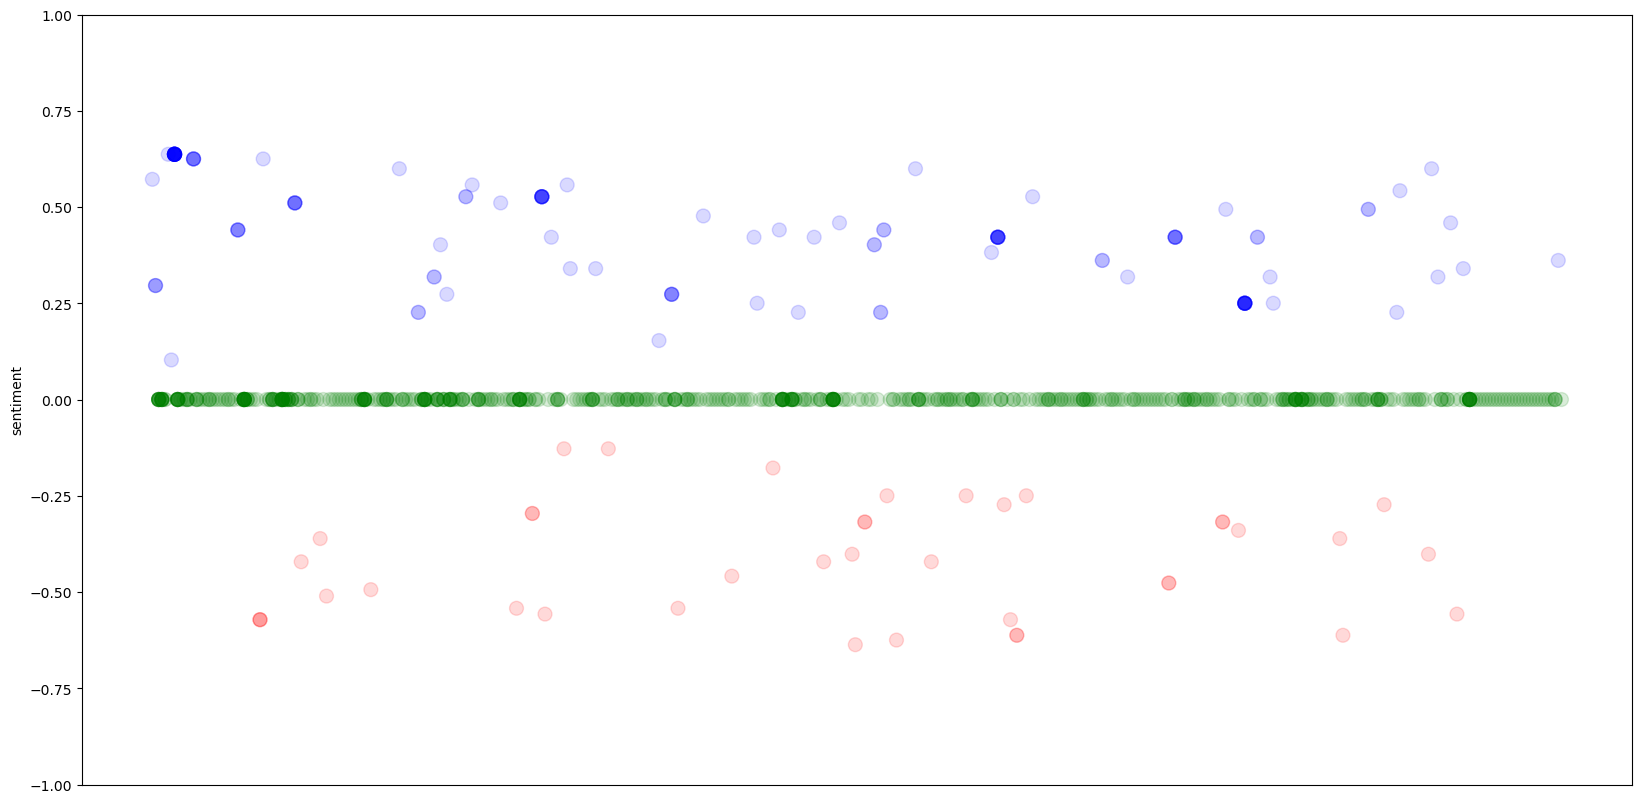

In [14]:
# create a dataframe with tokens column
df = pd.DataFrame({'tokens':tokens})

# add a column with the sentiment score for each token
df['sentiment'] = df['tokens'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# plot the sentiment score for each token with negative sentiment in red and positive sentiment in green
df['color'] = df['sentiment'].apply(lambda x: 'red' if x < 0 else ('blue' if x >0 else 'green'))

ax = df.plot.scatter(x='tokens',y='sentiment',figsize=(20,10),s=100,c=df['color'], alpha=0.15)

ax.set_ylim(-1,1)
ax.xaxis.set_tick_params(bottom=False, labelbottom=False)

# set the x-axis label
plt.xlabel('',fontsize=20)

num_of_positve_tokens = len(df[df['sentiment'] > 0])
num_of_negative_tokens = len(df[df['sentiment'] < 0])
num_of_neutral_tokens = len(df[df['sentiment'] == 0])

print("Number of positive tokens: ", num_of_positve_tokens)
print("Number of negative tokens: ", num_of_negative_tokens)
print("Number of neutral tokens: ", num_of_neutral_tokens)

## Challenge Accepted

### Below Created another word cloud of the speech with the words colored by their sentiment and creteria for positive, negative and neutral polarity are taken from the above similar to above codes. 

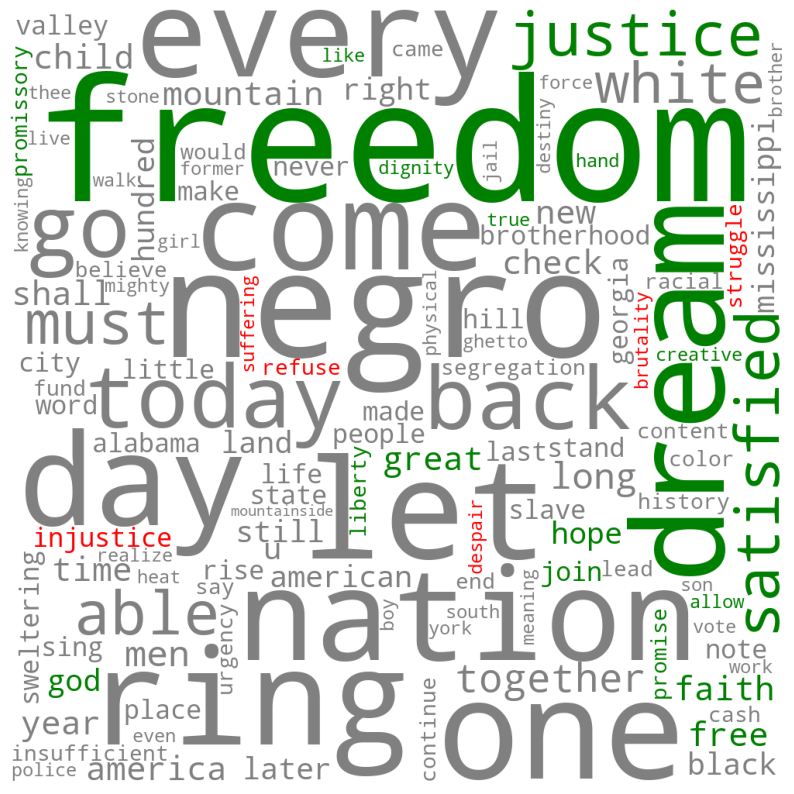

In [15]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

negative_words = 0
positive_words = 0
neutral_words = 0

word_sentiments = {}

# Determine sentiment for each word
for w in tokens:
    polarity = analyzer.polarity_scores(w)
    compound = polarity["compound"]

    if compound > 0.2:
        positive_words += 1
        word_sentiments[w] = "positive"
    elif compound < -0.2:
        negative_words += 1
        word_sentiments[w] = "negative"
    else:
        neutral_words += 1
        word_sentiments[w] = "neutral"

total_words = len(tokens)

# Define custom color function
def color_func(word, *args, **kwargs):
    sentiment = word_sentiments.get(word)
    if sentiment == "positive":
        return "green"  # Green for positive words
    elif sentiment == "negative":
        return "red"    # Red for negative words
    else:
        return "gray"   # Gray for neutral words

# Create word cloud
wordcloud = WordCloud(
    width=1000, 
    height=1000, 
    background_color='white', 
    color_func=color_func,
    collocations=False, 
    min_font_size=16
)


wordcloud.generate_from_frequencies(token_freq)
plt.figure(figsize = (10,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
